# Disease classification based on user symptoms with ANN

Our goal is to create a machine learning model which will be able to determine what disease(s) corresponds with the inputted list of symptoms. The dataset used for training is in tabular form, containing entries for 41 unique disease with multiple combinations of symptomps for each disease, for a total of 4920 entries

## Data pre-processing

### Checking for missing values

We will start by loading the data and checking if we have any invalid entries. Invalid entries in our case would be entries which have no Disease value, or entries which have no symptom values.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('Data/dataset.csv')

In [52]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.sample(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4494,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,NaN
1721,Gastroenteritis,vomiting,sunken_eyes,dehydration,diarrhoea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3136,Hepatitis B,itching,fatigue,lethargy,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,NaN,NaN,NaN,NaN,NaN
3693,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3427,Alcoholic hepatitis,vomiting,yellowish_skin,abdominal_pain,swelling_of_stomach,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3311,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,depression,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN
1432,Hepatitis B,fatigue,lethargy,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,NaN,NaN,NaN,NaN,NaN,NaN
1241,Allergy,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,prominent_veins_on_calf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4278,Jaundice,itching,vomiting,fatigue,weight_loss,high_fever,yellowish_skin,dark_urine,abdominal_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


We determine the fact that all entries are valid, for our dataset.

### Splitting in features and target variables, and encoding

In [2]:
X = data.drop('Disease', axis=1)
y = data['Disease']
X.head()


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
import numpy as np

unique_symp = X.stack().unique()
print(unique_symp[:7])
print(len(unique_symp))

['itching' ' skin_rash' ' nodal_skin_eruptions' ' dischromic _patches'
 ' continuous_sneezing' ' shivering' ' chills']
131


For the encoding and decoding process we will need to have the mapping information available. We create a mapping dictionary to use when encoding and decoding the features.

In [4]:
mapping_dict = {symptom: i for i, symptom in enumerate(unique_symp)}
mapping_dict

{'itching': 0,
 ' skin_rash': 1,
 ' nodal_skin_eruptions': 2,
 ' dischromic _patches': 3,
 ' continuous_sneezing': 4,
 ' shivering': 5,
 ' chills': 6,
 ' watering_from_eyes': 7,
 ' stomach_pain': 8,
 ' acidity': 9,
 ' ulcers_on_tongue': 10,
 ' vomiting': 11,
 ' cough': 12,
 ' chest_pain': 13,
 ' yellowish_skin': 14,
 ' nausea': 15,
 ' loss_of_appetite': 16,
 ' abdominal_pain': 17,
 ' yellowing_of_eyes': 18,
 ' burning_micturition': 19,
 ' spotting_ urination': 20,
 ' passage_of_gases': 21,
 ' internal_itching': 22,
 ' indigestion': 23,
 ' muscle_wasting': 24,
 ' patches_in_throat': 25,
 ' high_fever': 26,
 ' extra_marital_contacts': 27,
 ' fatigue': 28,
 ' weight_loss': 29,
 ' restlessness': 30,
 ' lethargy': 31,
 ' irregular_sugar_level': 32,
 ' blurred_and_distorted_vision': 33,
 ' obesity': 34,
 ' excessive_hunger': 35,
 ' increased_appetite': 36,
 ' polyuria': 37,
 ' sunken_eyes': 38,
 ' dehydration': 39,
 ' diarrhoea': 40,
 ' breathlessness': 41,
 ' family_history': 42,
 ' mucoid_

We use the one-hot encoding technique to encode the features

In [5]:
X_encoded = np.zeros((len(X), len(unique_symp))) 

for i, row in enumerate(X.values):
    for j, symp in enumerate(unique_symp):
        if symp in row:
            X_encoded[i,j] = 1

X_encoded = pd.DataFrame(X_encoded, columns = mapping_dict.keys())
X_encoded

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4918,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


We use the same technique on the target variable column, and then also save mapping information for it.

In [6]:
y_encoded = pd.get_dummies(y, dtype=float)
y_encoded

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
disease_labels =  y_encoded.columns.tolist()
disease_labels

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

We convert the dataframes to numpy arrays

In [8]:
X_array = X_encoded.values
y_array = y_encoded.values


## Training the model

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)


We split the dataset in training and testing sets using an 80-20 proportion. Later we will also split the training set again, to allow for validation during training.

The model architecture is a simple neural network with:

    -One input layer of a size equal to the number of unique symptoms in our dataset
    
    -Two hidden layers with 64 and 32 neurons, respectively
    
    -One output layer of a size equal to the number of unique diseases in our dataset, with the softmax activation function.
    
For the loss function we use categorical crossentropy, since our goal is outputting the correct probability of the output belonging to one or more of the classes (diseases, in our case). Aditionally, we monitor the accuracy metric and implement early stopping to stop the model from training when validation accuracy has not improved in the last 4 epochs.

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(layers.Dense(32, activation='relu'))  
model.add(layers.Dense(y_train.shape[1], activation='softmax'))  # Output layer

model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, mode='max')

history = model.fit(X_train, y_train, epochs=500, callbacks=[early_stopping],
            batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/500
99/99 [==============================] - 2s 3ms/step - loss: 3.0647 - accuracy: 0.4749 - val_loss: 1.8794 - val_accuracy: 0.9213
Epoch 2/500
99/99 [==============================] - 0s 2ms/step - loss: 0.8138 - accuracy: 0.9860 - val_loss: 0.1829 - val_accuracy: 1.0000
Epoch 3/500
99/99 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 4/500
99/99 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 5/500
99/99 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 6/500
31/31 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 1.0000
Test Loss: 0.009492631070315838
Test Accuracy: 1.0


In [11]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plots both loss and accuracy curves for a TensorFlow model's training history.

    Args:
         history: The history object returned by model.fit()
   """

    # Loss Plot
    plt.figure(figsize=(8, 6)) # Adjust figure size if needed
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # Accuracy Plot
    plt.figure(figsize=(8, 6)) # Adjust figure size if needed
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()


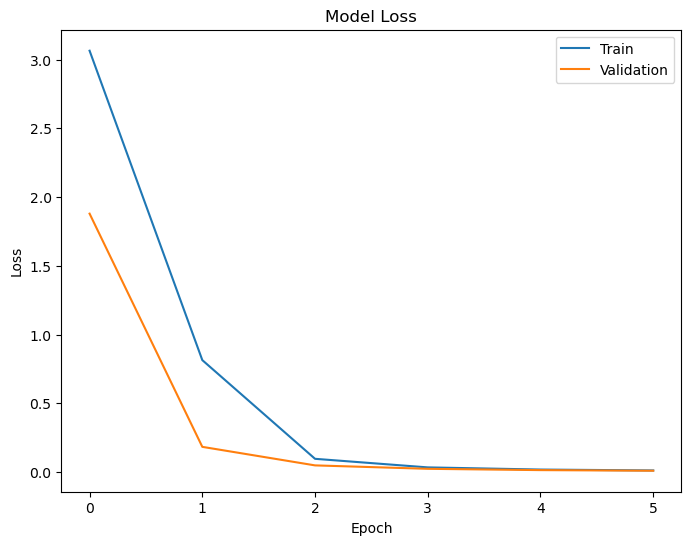

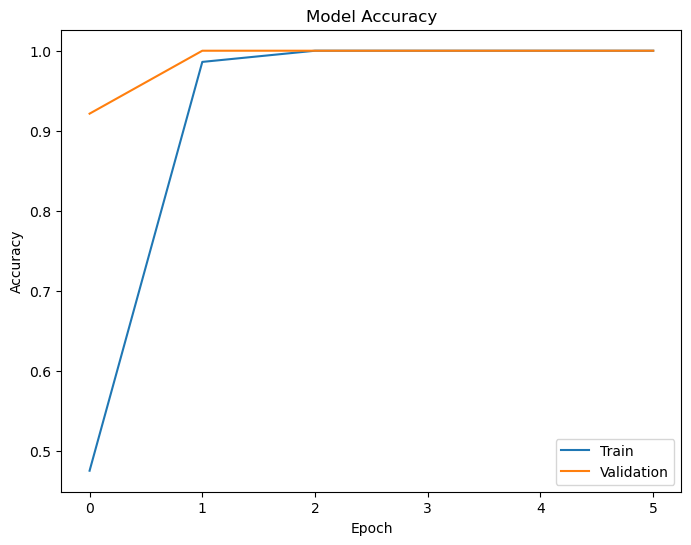

In [55]:
plot_training_history(history) 

## Using the model

To use the model we have to encode user input in the form on which the model was trained on, and then decode the model output to be able to interpret it.

We use fuzzywuzzy.fuzz to match user-inputted strings to the most similar symptom found in our training dataset.

In [61]:
from fuzzywuzzy import fuzz
def find_most_similar_symptoms(user_input, unique_symptoms):
    """
    Finds the most similar symptom to the user's input from a list of unique symptoms.
    
    Args:
      user_input: The user's input symptoms.
      unique_symptoms: A list of unique symptoms.
    
    Returns:
      The most similar symptoms from the list, along with its similarity score.
    """  
    output = list()
    
    for x in user_input:  
        best_match = ("", 0)  # Initialize variables to store the best match and its score
        for symptom in unique_symptoms:
            similarity_score = fuzz.ratio(x, symptom)  # Calculate similarity
            if similarity_score > best_match[1]:  # Check if better than the current best
              best_match = (symptom, similarity_score)
        output.append(best_match[0])
    
    return output
    
corrected_input = find_most_similar_symptoms(['cough','fever','runny nose'], unique_symp)
print(corrected_input)

[' cough', ' high_fever', ' runny_nose']


We encode the user input to required model input shape.

In [62]:
encoded_input = np.zeros(len(unique_symp))

In [63]:
# encoded_input = [mapping_dict[result] for result in corrected_input]  # Using the mapping
for result in corrected_input:
        encoded_input[mapping_dict[result]] = 1  # Set corresponding index to 1
encoded_input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We predict with our user input

In [64]:
encoded_input = encoded_input.reshape(1,-1)
predictions = model.predict(encoded_input)
print(predictions)

1/1 [==============================] - 0s 13ms/step
[[0.00213778 0.09102158 0.00675361 0.00319416 0.00673601 0.01097003
  0.08511905 0.00022743 0.05340144 0.00314196 0.1125309  0.03007792
  0.01223506 0.04168553 0.04717784 0.0345263  0.09689637 0.01944509
  0.01178622 0.00189633 0.0096294  0.00047309 0.00123353 0.00565922
  0.00699979 0.00802569 0.00240327 0.04590313 0.00422086 0.07420535
  0.00420269 0.01179984 0.01233968 0.00180523 0.03649862 0.01463786
  0.03084378 0.01409585 0.03865064 0.00467052 0.00074133]]


We decode the output array and show diseases which have a probability higher than our arbitrary threshold.

In [66]:
threshold =0.01
results=[]
for i, prob in enumerate(predictions[0]):
    if prob > threshold:
        disease_name = disease_labels[i]
        results.append((disease_name, prob))
print(results)

[('AIDS', 0.091021575), ('Arthritis', 0.010970032), ('Bronchial Asthma', 0.08511905), ('Chicken pox', 0.05340144), ('Common Cold', 0.1125309), ('Dengue', 0.030077918), ('Diabetes ', 0.0122350585), ('Dimorphic hemmorhoids(piles)', 0.041685533), ('Drug Reaction', 0.047177844), ('Fungal infection', 0.034526303), ('GERD', 0.09689637), ('Gastroenteritis', 0.01944509), ('Heart attack', 0.0117862215), ('Impetigo', 0.04590313), ('Malaria', 0.074205354), ('Osteoarthristis', 0.011799838), ('Paralysis (brain hemorrhage)', 0.01233968), ('Pneumonia', 0.036498617), ('Psoriasis', 0.014637856), ('Tuberculosis', 0.030843776), ('Typhoid', 0.014095853), ('Urinary tract infection', 0.03865064)]


In [18]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [19]:
import pickle
with open('mappings_and_symptoms.pkl', 'wb') as f:
    pickle.dump((disease_labels,mapping_dict, unique_symp), f)

In [67]:
!pip freeze > requirements.txt
